# グラフを描画する/Draw a graph

* PythonとNumpy，Matplotlibを利用して，データをグラフに描画する．

* Draw graphs of data using Python, Numpy, and Matplotlib.

* 下記のプログラムを実行すると，`data/car.txt`と`data/human.txt`の2つを読み込みグラフにする．グラフは`graph1.png`として保存される．

* Execute the following program and it reads `data/car.txt` and `data/human.txt` and makes a graph of them. The graph is saved as `graph1.png`.

# Googleドライブのマウント方法/How to mount Google Drive

* Google ドライブを Google Colab にマウント

* Mount Google Drive to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## モジュールのインポート/Import Modules

* 初めに，必要なモジュールを`import`文でインポートする．

* 次のモジュールをインポートする

 - `path`：ファイル構造を取り扱うためのライブラリ
 - `numpy`：数値計算ライブラリ
 - `matplotlib`：グラフ描画ライブラリ

* First, import the necessary modules with the `import` statement.

* Import the following modules

 - `path`：Library for handling file structures
 - `numpy`：Library for numerical calculation
 - `matplotlib`：Library for graph drawing
---
* `from os import path`は「osという名前のパッケージ」が存在し，そこから「pathという名前のモジュール」をインポートするということになる．

* `import numpy as np`はインポートしたnumpyに対して「np」という名前をつけるということになる．

* `from os import path` means that a package named "os" exists, and a module named "path" is imported from it. 

* `import numpy as np` means that the imported numpy is named "np".

In [ ]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

##ファイルの読み込み/Loading Files

* 次に，ファイルを開いて配列に入れる．

* Pythonには「リスト」と言う配列に似たものが標準で実装されているが，今回はnumpyの機能である配列を利用する．

* Next, we open the file and put it into an array.

* Python has a standard implementation of "lists," which are similar to arrays, but this time we will use an array, which is a function of numpy.
---
* `path.join`はpathモジュール内にある関数で，パスを連結する関数である．

* ここでは`path.join('data', 'car.txt')`とあるので，`data/car.txt`を返す．

* 変数`in_txt1`と`in_txt2`にはそれぞれ`data/car.txt`と`data/human.txt`への参照が入ることになる．

* `path.join` is a function in the path module that joins paths.

* Here `path.join('data', 'car.txt')` returns `data/car.txt`.

* The variables `in_txt1` and `in_txt2` are references to `data/car.txt` and `data/human.txt`, respectively.

In [ ]:
in_txt1 = open(path.join('/content/drive/MyDrive/Colab Notebooks/2data', 'car.txt'))
in_txt2 = open(path.join('/content/drive/MyDrive/Colab Notebooks/2data', 'human.txt'))

car = np.asarray([(line.strip()).split('\t') for line in in_txt1], dtype=float)
human = np.asarray([(line.strip()).split('\t') for line in in_txt2], dtype=float)

print(in_txt1)
print(in_txt2)

<_io.TextIOWrapper name='/content/drive/MyDrive/Colab Notebooks/2data/car.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/Colab Notebooks/2data/human.txt' mode='r' encoding='UTF-8'>


## 配列へ格納/Store in array

* 続いて，ファイルの中身を参照して配列に入れる．

* `car = np.asarray([(line.strip()).split('\t') for line in in_txt1])`では，1行でいろいろなことをやっている．

* これは「リスト内包表記」と呼び，リストを生成するときに簡単に記述できるようにしたものである．

* この1行をわかりやすく書き直すと次の通りになる：

* Then, the contents of the file are referenced and put into an array.

* `car = np.asarray([(line.strip()).split('\t') for line in in_txt1])` does various things in one line.

* This is called "list comprehension notation" and is intended to make it easy to write when generating lists.

* This one line can be rewritten in a simple way as follows

In [ ]:
in_txt1 = open(path.join('/content/drive/MyDrive/Colab Notebooks/2data', 'car.txt'))

car = []
for line in in_txt1:
  car.append( (line.strip()).split('\t') )
car = np.asarray(car, dtype=float)

* まず，`for line in in_txt1:`について説明する．

* このfor文の書き方はPython特有のものであり，ここでは「`in_txt1`の中身を変数`line`に1行ずつ入れて実行」という意味になる．

* これにより，テキストファイルを1行ずつ処理することができる．

* First, let me explain about `for line in in_txt1:`. 

* This for statement is specific to Python, and in this case it means "put the contents of `in_txt1` into the variable `line` one line at a time and execute it". 

* This allows a text file to be processed one line at a time.
---
* 続いて，`(line.strip()).split('\t')`の`line.strip()`は「文字列変数`line`から空白文字や改行コードを取り除く」ものである．

* これを行わずに処理を行うと，変数`line`に残っている改行コードが一緒に処理されてしまうため，変数やリストに改行コードが入ってしまうことになる．

* Next, `(line.strip()).split('\t')` of `(line.strip()).split('\t')` "removes white spaces and newline codes from the string variable `line`. 

* If processing is performed without this, line feed codes remaining in the variable `line` will be processed together, resulting in line feed codes in variables and lists.
---
* さらに続けて`.split('\t')`と記述することにより，先程得られた改行コードのない文字列を「指定された文字列で区切る」ことができる．

* ここでは`'\t'`つまりタブが指定されているため，タブで区切る．

* `1512.000000 (タブ) 26.779374`という文字列があったとき，この処理を行うことで`['1512.000000', '26.779374']`という1つの1次元リストにすることができる．

* 以上の処理をテキストファイル全体に行ったあと，`np.asarray()`でnumpyの配列に変換している．

* The following `.split('\t')` can be used to "delimit the string without newline code" obtained earlier. 

* Here, since `'\t'`, i.e., a tab is specified, it is separated by a tab.

* If there is a string `1512.000000 (tab) 26.779374`, this process makes it a one-dimensional list `['1512.000000', '26.779374']`.

* After the above process is done to the whole text file, it is converted to a numpy array with `np.asarray()`.

In [ ]:
print(car)

[[1512.         26.779374]
 [1802.         30.181811]
 [1624.         37.070186]
 [1595.         31.35323 ]
 [1705.         29.521916]
 [1595.         28.129919]
 [1740.         28.635195]
 [1920.         26.258527]
 [2046.         25.805478]
 [2304.         28.345481]
 [1980.         22.272106]
 [2184.         26.606136]
 [1855.         23.561031]
 [1980.         21.863881]
 [2223.         27.445359]
 [2301.         28.150374]
 [2840.         31.634094]
 [2652.         28.387444]
 [3096.         28.343877]
 [3010.         28.681518]
 [2706.         25.6541  ]
 [3234.         28.881692]
 [3243.         24.807416]
 [3430.         25.94729 ]
 [3834.         25.859545]
 [4400.         27.323686]
 [4218.         28.617058]
 [5124.         28.303789]
 [4503.         26.306446]
 [5146.         29.592637]
 [5355.         28.979888]
 [5056.         26.290137]
 [6090.         26.36577 ]
 [6336.         28.700233]
 [6825.         25.028423]
 [6106.         21.146658]
 [7998.         24.413585]
 

## グラフの描画/Drawing a graph

* 次に，matplotlibを用いてグラフの描画を行う．

* Next, draw the graph using matplotlib.
---
### 1. グラフ描画の準備/preparation for graph plotting

* fig = plt.figure()で，新規のプロットウィンドウを作成する．

* ペイントソフトで例えると「新しいキャンパスの作成」にあたる．

* subfig = fig.add_subplot(1,1,1)は，プロットウィンドウにグラフを追加する．

* 引数の1,1,1はそれぞれ行数,列数,何番目かを示す．

* ここではグラフは1つだけなので，すべて1で良い．

* 次の2行はグラフの描画エリアを示すものである．

* xminおよびyminはX軸およびY軸の最小値，xmaxおよびymaxはX軸およびY軸の最大値である．

* fig = plt.figure() creates a new plot window. 

* In painting software, this is analogous to "creating a new campus.

* subfig = fig.add_subplot(1,1,1) adds a graph to the plot window. 

* The arguments 1,1,1 indicate the number of rows, columns, and number of columns, respectively. 

* Since there is only one graph in this case, all 1's are sufficient.

* The next two lines indicate the plotting area of the graph.

* xmin and ymin are the minimum values on the X and Y axes, and xmax and ymax are the maximum values on the X and Y axes.
---
### 2. データのプロット/Plotting Data

* Pythonのリストやnumpyの配列では，`car[:,0]`のように:(コロン)を使うことで「その配列の要素すべて」を表すことができる．

* ここでは，`car[0,0]`,`car[1,0]`,`car[2,0]`,`car[3,0]`......と参照する．

* グラフのX軸を`car[:,0]`つまりファイルの1列目，Y軸を`car[:,1]`つまりファイルの2列目といった具合でプロットする．

* In Python lists and numpy arrays, you can use a: (colon) like `car[:,0]` to represent "all the elements of that array".

* Here, we refer to `car[0,0]`,`car[1,0]`,`car[2,0]`,`car[3,0]`...... and refer to the following.

* Plot the X-axis of the graph as `car[:,0]`, that is, the first column of the file, and the Y-axis as `car[:,1]`, that is, the second column of the file, and so on.
---
### 3. グラフのタイトルの追加と保存/Adding and saving graph titles

* 最後に，タイトル，横軸ラベル，縦軸ラベルを追加して保存する．

* プログラムの下部に赤と黒の散布図が表示されればOK．

* Finally, add a title, horizontal axis label, and vertical axis label, and save the file.

* If a red and black scatter plot appears at the bottom of the program, it is OK.

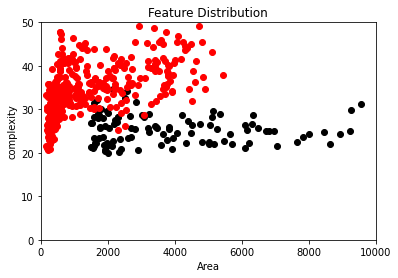

In [ ]:
# 1. グラフ描画の準備/Preparation for Graphing
fig = plt.figure()
subfig = fig.add_subplot(1,1,1)
plt.xlim(xmin=0, xmax = 10000)
plt.ylim(ymin=0, ymax = 50)

# 2. データのプロット/Plotting Data
subfig.scatter(car[:,0], car[:,1],color='black')
subfig.scatter(human[:,0], human[:,1],color='red')

# 3. グラフのタイトルの追加と保存/Adding and saving graph titles
subfig.set_title('Feature Distribution')
subfig.set_xlabel('Area')
subfig.set_ylabel('complexity')

plt.savefig("/content/drive/MyDrive/Colab Notebooks/2data/graph1.png")
plt.show()

#課題/quiz

* carのプロット点をblackではなくblueに変更せよ．
* グラフのy軸の範囲を変更せよ．
* Change the car plot point to BLUE instead of BLACK.
* Change the range of the y-axis of the graph.
---
##ヒント/Hints

* `color=''`の記述を変える．
* Yの最小値は20が良い．
* Change the description of `color=''`.
* The minimum value of Y should be 20.

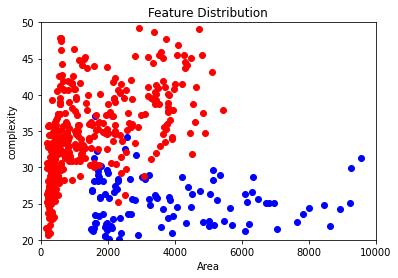

In [ ]:
# 1. グラフ描画の準備/Preparation for Graphing
fig = plt.figure()
subfig = fig.add_subplot(1,1,1)
plt.xlim(xmin=0, xmax = 10000)
plt.ylim(ymin=20, ymax = 50)

# 2. データのプロット/Plotting Data
subfig.scatter(car[:,0], car[:,1],color='blue')
subfig.scatter(human[:,0], human[:,1],color='red')

# 3. グラフのタイトルの追加と保存/Adding and saving graph titles
subfig.set_title('Feature Distribution')
subfig.set_xlabel('Area')
subfig.set_ylabel('complexity')

plt.savefig("/content/drive/MyDrive/Colab Notebooks/2data/graph2.png")
plt.show()